In [ ]:
!pip install pycaret
#!wget https://github.com/jirifilip/pyARC/archive/refs/heads/master.zip
#!unzip master.zip
#!pip install ./pyARC-master/
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 M

In [ ]:
#!pip install scikit-learn
# Clonar el repositorio de pyARC
#!git clone https://github.com/jirifilip/pyARC.git

# Cambiar al directorio pyARC
#%cd pyARC

# Instalar pyARC
#!pip install .

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pycaret.classification import *
from sklearn.preprocessing import StandardScaler
#from pyarc import TransactionDB
#from pyarc.algorithms import (
 #   createCARs, top_rules, run_apriori, run_cba
#)


In [ ]:
simulationProperties = pd.read_csv('./ENB2012_data_f.csv', sep=';')


In [ ]:
# se crean dos dataframes distintos, para los valores X y para Y por separado

X = simulationProperties[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y1 = simulationProperties[['Y1']]
y2 = simulationProperties[['Y2']]

In [ ]:
min_value = simulationProperties['Y1'].min()

print(f'El valor más pequeño de la columna "Y1" es: {min_value}')

El valor más pequeño de la columna "Y1" es: 6.01


In [ ]:
#aca se normalizan los datos
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_normalized1 = pd.DataFrame(X_norm, columns=X.columns)
X_normalized2 = pd.DataFrame(X_norm, columns=X.columns)

#se añaden los target existen dos y, por lo tanto 2 target

X_normalized1['target'] = y1

X_normalized2['target'] = y2

In [ ]:
# aca se revisara cuantos elementos unicos tiene Y1

unique1 = y1['Y1'].nunique()
print(f'La columna tiene {unique1} valores únicos.')
#lo mismo pero Y2

unique2 = y2['Y2'].nunique()
print(f'La columna tiene {unique2} valores únicos.')

La columna tiene 586 valores únicos.
La columna tiene 636 valores únicos.


In [ ]:
# aca se revisara cuantos elementos unicos tiene Y1

unique1 = X['X8'].nunique()
print(f'La columna tiene {unique1} valores únicos.')
#lo mismo pero Y2

unique2 = y2['Y2'].nunique()
print(f'La columna tiene {unique2} valores únicos.')

La columna tiene 6 valores únicos.
La columna tiene 636 valores únicos.


In [ ]:


#primero se revisaran los cuartiles de y1 e y2


q1 = y1['Y1'].quantile(0.25)
q2 = y1['Y1'].quantile(0.50)
q3 = y1['Y1'].quantile(0.75)

print("Cuartil 25:", q1)
print("Cuartil 50:", q2)
print("Cuartil 75:", q3)


q4 = y2['Y2'].quantile(0.25)
q5 = y2['Y2'].quantile(0.50)
q6 = y2['Y2'].quantile(0.75)






Cuartil 25: 12.9925
Cuartil 50: 18.95
Cuartil 75: 31.6675


In [ ]:
# Agrupar valores del target en categorías manejables para el target y1
def group_target(value,q1,q2,q3):
    if value < q1:
        return "HL1"
    elif value < q2:
        return "HL2"
    elif value < q3:
      return "HL3"

    else:
        return "HL4"


def group_target2(value,q1,q2,q3):
    if value < q1:
        return "CL1"
    elif value < q2:
        return "CL2"
    elif value < q3:
      return "CL3"

    else:
        return "CL4"




#Aplica la función group_target para crear la nueva columna 'target_grouped'
X_normalized2['target_grouped'] = X_normalized2['target'].apply(lambda x: group_target2(x, q4, q5, q6))
X_normalized1['target_grouped'] = X_normalized1['target'].apply(lambda x: group_target(x, q1, q2, q3))

In [ ]:


# Convertir los valores de la columna objetivo a tipo str
X_normalized1['target_grouped'] = X_normalized1['target_grouped'].astype(str)

# Verificar los valores únicos en la columna objetivo
print(X_normalized1['target_grouped'].unique())

['HL2' 'HL3' 'HL1' 'HL4']


In [ ]:
# Guardar el DataFrame normalizado 1 como un archivo CSV
X_normalized1.to_csv('X_normalized1.csv', index=False)

# Descargar el archivo CSV desde Google Colab
from google.colab import files
files.download('X_normalized1.csv')


# Guardar el DataFrame normalizado 2 como un archivo CSV
X_normalized2.to_csv('X_normalized2.csv', index=False)

# Descargar el archivo CSV desde Google Colab
from google.colab import files
files.download('X_normalized2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Inicializar el entorno de PyCaret para el target y1
clf = setup(data=X_normalized1, target='target_grouped', session_id=123)

# Comparar modelos
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,target_grouped
2,Target type,Multiclass
3,Target mapping,"HL1: 0, HL2: 1, HL3: 2, HL4: 3"
4,Original data shape,"(768, 10)"
5,Transformed data shape,"(768, 10)"
6,Transformed train set shape,"(537, 10)"
7,Transformed test set shape,"(231, 10)"
8,Numeric features,9
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9963,0.9975,0.9963,0.9965,0.9963,0.9950,0.9951,0.1230
rf,Random Forest Classifier,0.9963,1.0000,0.9963,0.9965,0.9963,0.9950,0.9951,0.3880
gbc,Gradient Boosting Classifier,0.9963,0.0000,0.9963,0.9965,0.9963,0.9950,0.9951,1.0510
xgboost,Extreme Gradient Boosting,0.9963,0.9981,0.9963,0.9965,0.9963,0.9950,0.9951,0.0910
lightgbm,Light Gradient Boosting Machine,0.9906,1.0000,0.9906,0.9912,0.9906,0.9875,0.9877,0.8470
et,Extra Trees Classifier,0.9702,0.9991,0.9702,0.9733,0.9701,0.9603,0.9614,0.1820
lr,Logistic Regression,0.9647,0.0000,0.9647,0.9690,0.9644,0.9529,0.9545,1.3000
knn,K Neighbors Classifier,0.9461,0.9938,0.9461,0.9514,0.9456,0.9281,0.9301,0.1360
lda,Linear Discriminant Analysis,0.8864,0.0000,0.8864,0.8943,0.8862,0.8485,0.8510,0.0370
ridge,Ridge Classifier,0.8325,0.0000,0.8325,0.8378,0.8309,0.7767,0.7795,0.1280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Inicializar el entorno de PyCaret para el target y1
clf2 = setup(data=X_normalized2, target='target_grouped', session_id=123)

# Comparar modelos
best_model2 = compare_models()

,Description,Value
0,Session id,123
1,Target,target_grouped
2,Target type,Multiclass
3,Target mapping,"CL1: 0, CL2: 1, CL3: 2, CL4: 3"
4,Original data shape,"(768, 10)"
5,Transformed data shape,"(768, 10)"
6,Transformed train set shape,"(537, 10)"
7,Transformed test set shape,"(231, 10)"
8,Numeric features,9
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9926,0.9992,0.9926,0.9931,0.9925,0.9901,0.9903,0.0850
lightgbm,Light Gradient Boosting Machine,0.9926,0.9996,0.9926,0.9931,0.9925,0.9901,0.9903,1.3290
dt,Decision Tree Classifier,0.9925,0.9950,0.9925,0.9929,0.9925,0.9900,0.9902,0.0730
rf,Random Forest Classifier,0.9925,0.9999,0.9925,0.9929,0.9925,0.9900,0.9902,0.7080
gbc,Gradient Boosting Classifier,0.9925,0.0000,0.9925,0.9929,0.9925,0.9900,0.9902,1.2360
lr,Logistic Regression,0.9776,0.0000,0.9776,0.9784,0.9776,0.9701,0.9704,0.2650
et,Extra Trees Classifier,0.9517,0.9977,0.9517,0.9547,0.9516,0.9356,0.9366,0.1780
knn,K Neighbors Classifier,0.9497,0.9978,0.9497,0.9523,0.9497,0.9329,0.9338,0.1070
lda,Linear Discriminant Analysis,0.8901,0.0000,0.8901,0.8982,0.8900,0.8535,0.8560,0.0610
ridge,Ridge Classifier,0.8269,0.0000,0.8269,0.8349,0.8258,0.7692,0.7723,0.1690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Crear y evaluar el mejor modelo para y1
model = create_model('lr')
evaluate_model(model)


# Crear y evaluar el mejor modelo para y2
model2 = create_model('lr')
evaluate_model(model2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.0000,0.9630,0.9630,0.9630,0.9506,0.9506
1,0.9630,0.0000,0.9630,0.9642,0.9629,0.9506,0.9510
2,0.9815,0.0000,0.9815,0.9828,0.9815,0.9753,0.9757
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9630,0.0000,0.9630,0.9643,0.9630,0.9506,0.9511
7,0.9811,0.0000,0.9811,0.9825,0.9811,0.9748,0.9753
8,0.9434,0.0000,0.9434,0.9447,0.9434,0.9245,0.9250


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.0000,0.9630,0.9630,0.9630,0.9506,0.9506
1,0.9630,0.0000,0.9630,0.9642,0.9629,0.9506,0.9510
2,0.9815,0.0000,0.9815,0.9828,0.9815,0.9753,0.9757
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9630,0.0000,0.9630,0.9643,0.9630,0.9506,0.9511
7,0.9811,0.0000,0.9811,0.9825,0.9811,0.9748,0.9753
8,0.9434,0.0000,0.9434,0.9447,0.9434,0.9245,0.9250


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#preprocesamiento para cba

# Agrupar valores del target en categorías manejables para el target y1
def discretizarX1(value):

  return "RC" + str(value)

def discretizarX2(value):

  return "SA" + str(value)

def discretizarX3(value):

  return "WA" + str(value)


def discretizarX4(value):

  return "RA" + str(value)

def discretizarX5(value):

  return "OH" + str(value)

def discretizarX6(value):

  return "OR" + str(value)

def discretizarX7(value):

  return "GA" + str(value)

def discretizarX8(value):

  return "GAD" + str(value)

X['X1'] = X['X1'].apply(discretizarX1)
X['X2'] = X['X2'].apply(discretizarX2)
X['X3'] = X['X3'].apply(discretizarX3)
X['X4'] = X['X4'].apply(discretizarX4)
X['X5'] = X['X5'].apply(discretizarX5)
X['X6'] = X['X6'].apply(discretizarX6)
X['X7'] = X['X7'].apply(discretizarX7)
X['X8'] = X['X8'].apply(discretizarX8)



In [ ]:
unique3 = X['X1'].nunique()
print(f'La columna tiene {unique3} valores únicos.')
unique4 = X['X2'].nunique()
print(f'La columna tiene {unique4} valores únicos.')
unique5 = X['X3'].nunique()
print(f'La columna tiene {unique5} valores únicos.')
unique6 = X['X4'].nunique()
print(f'La columna tiene {unique6} valores únicos.')
unique7 = X['X5'].nunique()
print(f'La columna tiene {unique7} valores únicos.')
unique8 = X['X6'].nunique()
print(f'La columna tiene {unique8} valores únicos.')
unique9 = X['X7'].nunique()
print(f'La columna tiene {unique9} valores únicos.')
unique10 = X['X8'].nunique()
print(f'La columna tiene {unique10} valores únicos.')

La columna tiene 12 valores únicos.
La columna tiene 12 valores únicos.
La columna tiene 7 valores únicos.
La columna tiene 4 valores únicos.
La columna tiene 2 valores únicos.
La columna tiene 4 valores únicos.
La columna tiene 4 valores únicos.
La columna tiene 6 valores únicos.


In [ ]:
# Guardar el DataFrame discretizado X como un archivo CSV
X.to_csv('XDiscretizado.csv', index=False)

# Descargar el archivo CSV desde Google Colab
from google.colab import files
files.download('XDiscretizado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Agrupar valores del target en categorías manejables para el target y1
def group_target(value):
    if value < 10:
        return "HL1"
    elif value < 20:
        return "HL2"
    elif value < 30:
      return "HL3"

    elif value < 40:
      return "HL4"

    else:
        return "HL5"


def group_target2(value):
    if value < 20:
        return "CL1"
    elif value < 30:
        return "CL2"
    elif value < 40:
      return "CL3"

    else:
        return "CL4"




#Aplica la función group_target para crear la nueva columna 'target_grouped'
simulationProperties['Y2'] = simulationProperties['Y2'].apply(group_target2)
simulationProperties['Y1'] = simulationProperties['Y1'].apply(group_target)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = simulationProperties[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y = simulationProperties[['Y1', 'Y2']]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_norm)

pca = PCA(n_components=5)  # PCA con 5 componentes principales
principal_components = pca.fit_transform(X_norm)

# Crear un DataFrame de pandas con los resultados del PCA
pca_df = pd.DataFrame(data=principal_components, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
pca_df2 =pd.DataFrame(data=principal_components, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
# Añadir la columna target al DataFrame de PCA
#pca_df = pd.concat([pca_df, target.reset_index(drop=True)], axis=1)

pca_df["Y1"] = simulationProperties["Y1"]
pca_df2["Y2"] = simulationProperties["Y2"]


def discretizarX1(value):

  return "X1" + str(round(value, 3))

def discretizarX2(value):

  return "X2" + str(round(value, 3))

def discretizarX3(value):

  return "X3" + str(round(value, 3))


def discretizarX4(value):

  return "X4" + str(round(value, 3))

def discretizarX5(value):

  return "X5" + str(round(value, 3))


pca_df['x1'] = pca_df['x1'].apply(discretizarX1)
pca_df['x2'] = pca_df['x2'].apply(discretizarX2)
pca_df['x3'] = pca_df['x3'].apply(discretizarX3)
pca_df['x4'] = pca_df['x4'].apply(discretizarX4)
pca_df['x5'] = pca_df['x5'].apply(discretizarX5)






In [ ]:
# revisando valores unicos

unique3 = pca_df['x1'].nunique()
print(f'La columna tiene {unique3} valores únicos.')
unique4 = pca_df['x2'].nunique()
print(f'La columna tiene {unique4} valores únicos.')
unique5 = pca_df['x3'].nunique()
print(f'La columna tiene {unique5} valores únicos.')
unique6 = pca_df['x4'].nunique()
print(f'La columna tiene {unique6} valores únicos.')
unique7 = pca_df['x5'].nunique()
print(f'La columna tiene {unique7} valores únicos.')

La columna tiene 12 valores únicos.
La columna tiene 11 valores únicos.
La columna tiene 16 valores únicos.
La columna tiene 4 valores únicos.
La columna tiene 16 valores únicos.


In [ ]:
# Guardar el DataFrame con pca  discretizado como un archivo CSV
pca_df.to_csv('DataDiscretizado.csv', index=False)

# Descargar el archivo CSV desde Google Colab
from google.colab import files
files.download('DataDiscretizado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#aca se normalizan los datos
#scaler = StandardScaler()
#X_norm = scaler.fit_transform(X)

#X_normalized3 = pd.DataFrame(X_norm, columns=X.columns)
#X_normalized4 = pd.DataFrame(X_norm, columns=X.columns)

X = simulationProperties[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]

X_normalized3 = pd.DataFrame(X, columns=X.columns)
X_normalized4 = pd.DataFrame(X, columns=X.columns)


#se añaden los target existen dos y, por lo tanto 2 target

X_normalized3['Y1'] = y1

X_normalized4['Y2'] = y2






def group_target(value):
    if value < 10:
        return "HL1"
    elif value < 20:
        return "HL2"
    elif value < 30:
      return "HL3"

    elif value < 40:
      return "HL4"

    else:
        return "HL5"


def group_target2(value):
    if value < 20:
        return "CL1"
    elif value < 30:
        return "CL2"
    elif value < 40:
      return "CL3"

    else:
        return "CL4"




#Aplica la función group_target para crear la nueva columna 'target_grouped'
X_normalized4['Y2'] = X_normalized4['Y2'].apply(group_target2)
X_normalized3['Y1'] = X_normalized3['Y1'].apply(group_target)

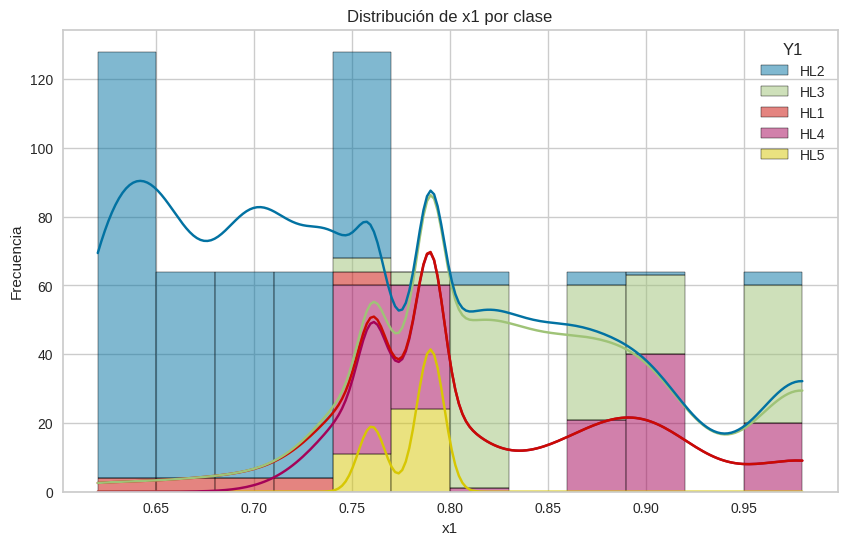

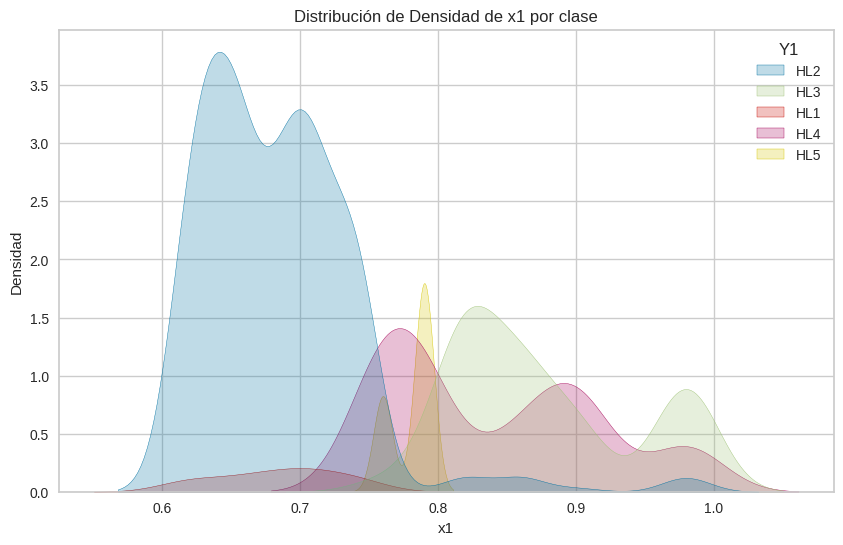

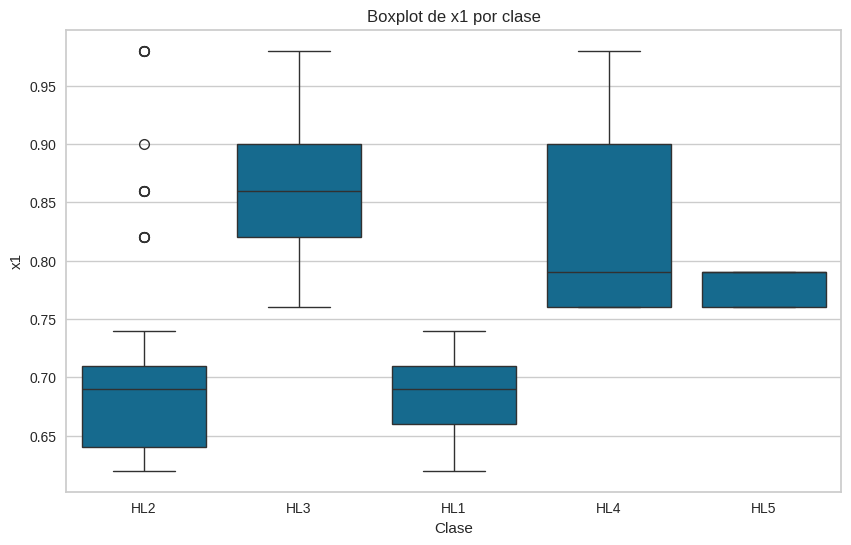

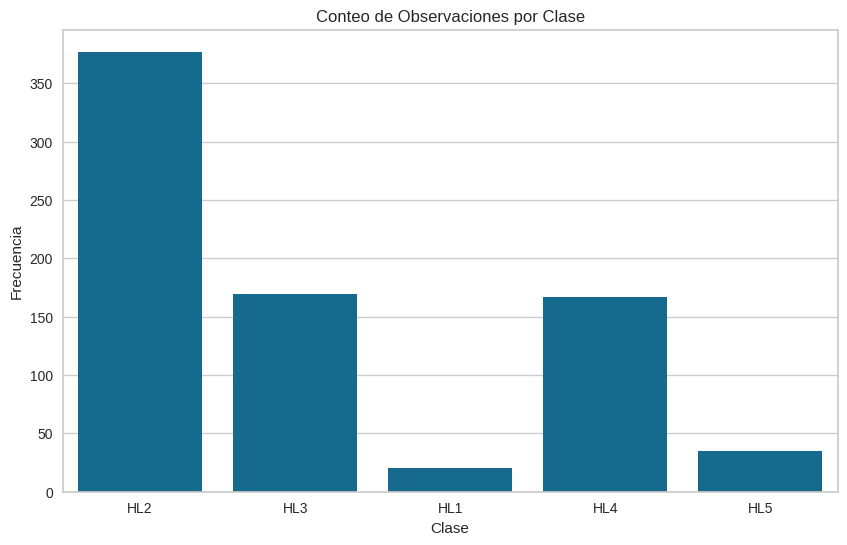

In [ ]:
import seaborn as sns

# Crear un histograma de 'x1' por clase en 'target'
plt.figure(figsize=(10, 6))
sns.histplot(X_normalized3, x='X1', hue='Y1', multiple='stack', kde=True)
plt.title('Distribución de x1 por clase')
plt.xlabel('x1')
plt.ylabel('Frecuencia')
plt.show()

# Crear un gráfico de densidad de 'x1' por clase en 'target'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_normalized3, x='X1', hue='Y1', fill=True)
plt.title('Distribución de Densidad de x1 por clase')
plt.xlabel('x1')
plt.ylabel('Densidad')
plt.show()

# Crear un boxplot de 'x1' por clase en 'target'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Y1', y='X1', data=X_normalized3)
plt.title('Boxplot de x1 por clase')
plt.xlabel('Clase')
plt.ylabel('x1')
plt.show()

# Crear un countplot de la variable objetivo
plt.figure(figsize=(10, 6))
sns.countplot(x='Y1', data=X_normalized3)
plt.title('Conteo de Observaciones por Clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Guardar el DataFrame con pca  discretizado como un archivo CSV
X_normalized3.to_csv('X_normalized3.csv', index=False)

# Descargar el archivo CSV desde Google Colab
from google.colab import files
files.download('X_normalized3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>